In [21]:
import pandas as pd
import json

base_path = 'data/SkillSpan/json/'
file_names = ['dev.json', 'train.json']

dfs = {}

for file_name in file_names:
    file_path = base_path + file_name
    with open(file_path, 'r') as file:
        json_data = json.load(file)
        dfs[file_name.split('.')[0]] = pd.DataFrame(json_data)

dev_df = dfs['dev']
train_df = dfs['train']

dev_df['idx'] = dev_df['idx'].apply(lambda x: f'dev{x}')
train_df['idx'] = train_df['idx'].apply(lambda x: f'train{x}')


print("Dev DataFrame:")
print(dev_df.head())

print("\nTrain DataFrame:")
print(train_df.head())

Dev DataFrame:
    idx                                             tokens  \
0  dev1  [DevOps, Engineer, (, CI, CD, Cloud, Docker, J...   
1  dev1  [<ADDRESS>, <ADDRESS>, <LOCATION>, -, <LOCATION>]   
2  dev1                        [Date, posted:, 2021-04-22]   
3  dev1                [Likes:, 0, Dislikes:, 0, Love:, 0]   
4  dev1                                [Job, description:]   

                       tags_skill                  tags_knowledge source  
0  [O, O, O, O, O, O, O, O, O, O]  [O, O, O, O, O, O, O, O, O, O]   tech  
1                 [O, O, O, O, O]                 [O, O, O, O, O]   tech  
2                       [O, O, O]                       [O, O, O]   tech  
3              [O, O, O, O, O, O]              [O, O, O, O, O, O]   tech  
4                          [O, O]                          [O, O]   tech  

Train DataFrame:
      idx                                             tokens  \
0  train1  [Senior, QA, Engineer, (, m/f/d, ), <ORGANIZAT...   
1  train1  [<ADD

In [23]:
def process_entries(group):
    combined_text = []
    combined_skills = []
    combined_knowledge = []
    source = None

    for _, row in group.iterrows():
        combined_text.extend(row['tokens'])
        
        temp_skills = []
        temp_knowledge = []
        
        for token, skill_tag, knowledge_tag in zip(row['tokens'], row['tags_skill'], row['tags_knowledge']):
            if skill_tag.startswith('B'):
                temp_skills.append(token)
            elif skill_tag.startswith('I') and temp_skills:
                temp_skills[-1] += f' {token}'
            
            if knowledge_tag.startswith('B'):
                temp_knowledge.append(token)
            elif knowledge_tag.startswith('I') and temp_knowledge:
                temp_knowledge[-1] += f' {token}'

        if temp_skills:
            combined_skills.extend(temp_skills)
        if temp_knowledge:
            combined_knowledge.extend(temp_knowledge)
        source = row['source']

    text = ' '.join(combined_text)
    
    return pd.Series([text, combined_skills, combined_knowledge, source], index=['text', 'skills', 'knowledge', 'source'])

def process_dataframe(df):
    grouped_df = df.groupby('idx').apply(process_entries).reset_index()
    return grouped_df

processed_dev_df = process_dataframe(dev_df)
processed_train_df = process_dataframe(train_df)

final_df = pd.concat([processed_dev_df, processed_train_df, processed_test_df], ignore_index=True)

final_df.head()

,idx,text,skills,knowledge,source
0,dev1,DevOps Engineer ( CI CD Cloud Docker Jenkins )...,"[high calibre, experienced, hands-on, develop/...","[Consulting, Information Technology, IT Consul...",tech
1,dev10,React/HTML5 Tech lead <ORGANIZATION> <ORGANIZA...,"[architect design and develop the platform, de...","[reactjs, agile, html, Degree in computer scie...",tech
2,dev11,Software Engineer <ORGANIZATION> <ORGANIZATION...,"[developing applications and tools, support an...","[Financial Services, node.js, python, javascri...",tech
3,dev12,Senior Fullstack Engineer ( m/f/d ) - OMS <ORG...,"[ensure code quality, enforce best practices, ...","[E-Commerce, reactjs, php, mysql, agile SW-dev...",tech
4,dev13,Site Reliability Engineer <ORGANIZATION> <ORGA...,"[passionate, build a lot from scratch, help ou...","[Banking, Financial Services, Financial Techno...",tech


In [24]:
def process_entries(group):
    combined_text = []
    combined_skills = []
    combined_knowledge = []
    source = None

    for _, row in group.iterrows():
        combined_text.extend(row['tokens'])
        
        temp_skills = []
        temp_knowledge = []
        
        for token, skill_tag, knowledge_tag in zip(row['tokens'], row['tags_skill'], row['tags_knowledge']):
            if skill_tag.startswith('B'):
                temp_skills.append(token)
            elif skill_tag.startswith('I') and temp_skills:
                temp_skills[-1] += f' {token}'
            
            if knowledge_tag.startswith('B'):
                temp_knowledge.append(token)
            elif knowledge_tag.startswith('I') and temp_knowledge:
                temp_knowledge[-1] += f' {token}'

        if temp_skills:
            combined_skills.extend(temp_skills)
        if temp_knowledge:
            combined_knowledge.extend(temp_knowledge)
        source = row['source']

    text = ' '.join(combined_text)
    
    return pd.Series([text, combined_skills, combined_knowledge, source], index=['text', 'skills', 'knowledge', 'source'])

def process_dataframe(df):
    grouped_df = df.groupby('idx').apply(process_entries).reset_index()
    return grouped_df

processed_dev_df = process_dataframe(dev_df)
processed_train_df = process_dataframe(train_df)

final_df = pd.concat([processed_dev_df, processed_train_df], ignore_index=True)

final_df.head()

,idx,text,skills,knowledge,source
0,dev1,DevOps Engineer ( CI CD Cloud Docker Jenkins )...,"[high calibre, experienced, hands-on, develop/...","[Consulting, Information Technology, IT Consul...",tech
1,dev10,React/HTML5 Tech lead <ORGANIZATION> <ORGANIZA...,"[architect design and develop the platform, de...","[reactjs, agile, html, Degree in computer scie...",tech
2,dev11,Software Engineer <ORGANIZATION> <ORGANIZATION...,"[developing applications and tools, support an...","[Financial Services, node.js, python, javascri...",tech
3,dev12,Senior Fullstack Engineer ( m/f/d ) - OMS <ORG...,"[ensure code quality, enforce best practices, ...","[E-Commerce, reactjs, php, mysql, agile SW-dev...",tech
4,dev13,Site Reliability Engineer <ORGANIZATION> <ORGA...,"[passionate, build a lot from scratch, help ou...","[Banking, Financial Services, Financial Techno...",tech


In [25]:
def add_counts_to_df(df):
    df['skills_count'] = df['skills'].apply(len)
    df['knowledge_count'] = df['knowledge'].apply(len)
    return df

In [28]:
final_df_with_counts = add_counts_to_df(final_df)
final_df_with_counts.head()  

,idx,text,skills,knowledge,source,skills_count,knowledge_count
0,dev1,DevOps Engineer ( CI CD Cloud Docker Jenkins )...,"[high calibre, experienced, hands-on, develop/...","[Consulting, Information Technology, IT Consul...",tech,36,56
1,dev10,React/HTML5 Tech lead <ORGANIZATION> <ORGANIZA...,"[architect design and develop the platform, de...","[reactjs, agile, html, Degree in computer scie...",tech,2,29
2,dev11,Software Engineer <ORGANIZATION> <ORGANIZATION...,"[developing applications and tools, support an...","[Financial Services, node.js, python, javascri...",tech,13,17
3,dev12,Senior Fullstack Engineer ( m/f/d ) - OMS <ORG...,"[ensure code quality, enforce best practices, ...","[E-Commerce, reactjs, php, mysql, agile SW-dev...",tech,11,19
4,dev13,Site Reliability Engineer <ORGANIZATION> <ORGA...,"[passionate, build a lot from scratch, help ou...","[Banking, Financial Services, Financial Techno...",tech,19,22


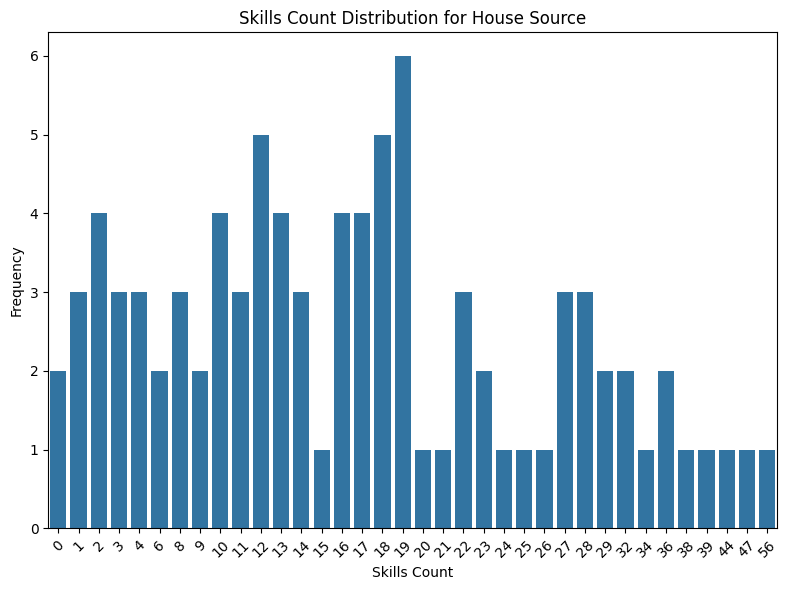

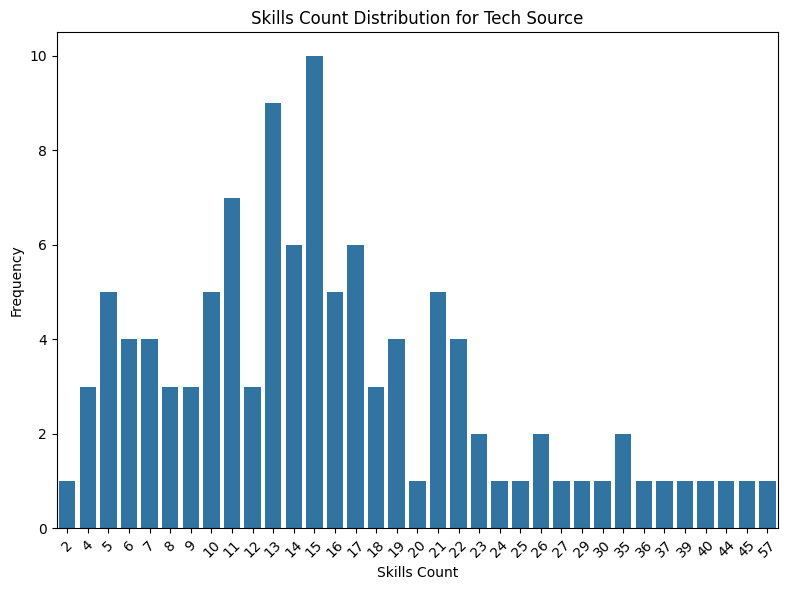

In [39]:
import matplotlib.pyplot as plt
import seaborn as sns

df_house = final_df[final_df['source'] == 'house']
df_tech = final_df[final_df['source'] == 'tech']

fig, ax1 = plt.subplots(figsize=(8, 6))  # Plot for 'house' source
sns.countplot(x='skills_count', data=df_house, ax=ax1)
ax1.set_title('Skills Count Distribution for House Source')
ax1.set_xlabel('Skills Count')
ax1.set_ylabel('Frequency')
plt.xticks(rotation=45) 
plt.tight_layout() 
plt.show()

fig, ax2 = plt.subplots(figsize=(8, 6))  # Plot for 'tech' source
sns.countplot(x='skills_count', data=df_tech, ax=ax2)
ax2.set_title('Skills Count Distribution for Tech Source')
ax2.set_xlabel('Skills Count')
ax2.set_ylabel('Frequency')
plt.xticks(rotation=45)  # Rotating x-axis labels
plt.tight_layout()  # Adjust layout
plt.show()
